In [38]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

In [1]:
import numpy as np
import scipy.integrate 

In [43]:
Q_0 = 342
eps = 0.62
delt = 5.67 * 1e-8
alpha = 0.3
C = 2.08 * 1e8 

def f(t,T):                                             
    return ((1-alpha)*Q_0 - eps*delt*(T**4))

sol = scipy.integrate.solve_ivp(f,(0.0,20),[270.0])

In [49]:
sol.y[0]

array([270.        , 275.0799114 , 284.57159974, 286.68075692,
       287.16580634, 287.22921651, 287.17189883, 287.12454508,
       287.04973457, 286.99028094, 287.0569029 , 287.13830601,
       287.1515087 , 287.08484508, 286.96354165, 286.98997645,
       287.12022398, 287.17123812, 287.13256876, 286.97651091,
       287.11635845, 287.19039533, 287.1583184 , 287.24771763])

In [2]:
T = 100

def mu(t):
    return 2/T * t - 1

def f(x,t): 
    return x - x**3 /3.0 - mu(t)

ts = np.linspace(0,T,10)

i = 0

sol = scipy.integrate.solve_ivp(lambda t,x: f(x,ts[i]),(0.0,100),[2.0],method="BDF")

In [4]:
sol.y[0]

array([2.        , 2.00146472, 2.00291054, 2.01586386, 2.02726281,
       2.06875159, 2.08891992, 2.09766943, 2.10098043, 2.10213967,
       2.10350764, 2.10418652, 2.10416479, 2.10385419, 2.10375894,
       2.10378528, 2.10380221, 2.10380697, 2.10380361, 2.10380336])

In [6]:
fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += rng.normal(scale=np.sqrt(noise_power), size=time.shape)

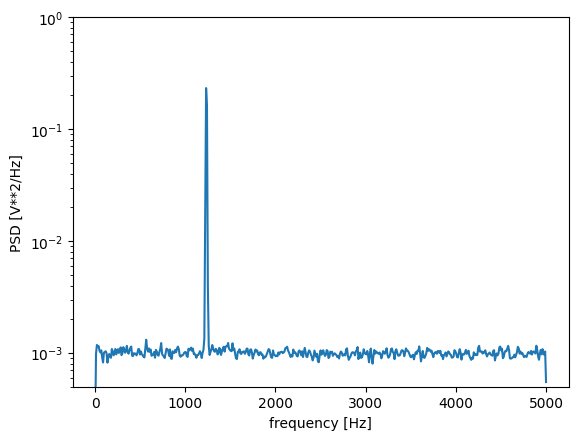

In [15]:
f, Pxx_den = signal.welch(x, fs, nperseg=1024)
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [53]:
np.random.seed(0)
x = np.random.normal(scale = 1, size = 20)
x > 0.7
np.argmin(x>0)

5

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [23]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

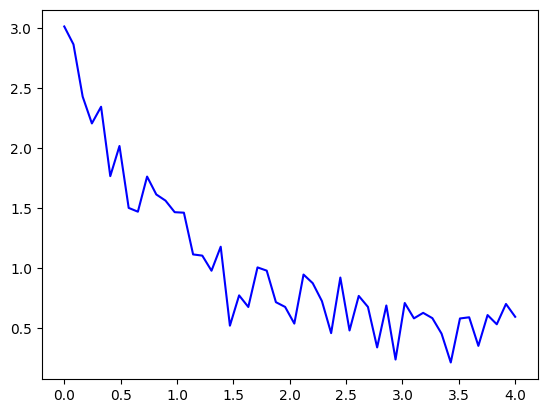

In [24]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

In [25]:
popt, pcov = curve_fit(func, xdata, ydata)

In [28]:
pcov[0]

array([ 0.01030858,  0.00312727, -0.00092511])